# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_merge = study_results.merge(mouse_metadata, on="Mouse ID", how='inner')

# Display the data table for preview
df_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [50]:
# Checking the number of mice.
(df_merge["Mouse ID"].nunique())

249

In [52]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_merge [df_merge[["Mouse ID", "Timepoint"]].duplicated()]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [55]:
# Optional: Get all the data for the duplicate mouse ID. 
df_merge[df_merge["Mouse ID"]=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_merge_drop = df_merge.drop( df_merge[df_merge["Mouse ID"]=='g989'].index )
df_merge_drop.shape

(1880, 8)

In [69]:
# Checking the number of mice in the clean DataFrame.
df_merge_drop["Mouse ID"].nunique()

248

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
from scipy.stats import sem
dfmean = df_merge_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().rename("Mean Tumor Volume")
dfmedian = df_merge_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().rename("Median Tumor Volume")
dfvar = df_merge_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().rename("Tumor Volume Variange")
dfstd = df_merge_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().rename("Tumor Volume Std. Dev.")
dfsem = df_merge_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().rename("Tumor Volume Std. Err.")


df_stats = pd.concat([dfmean, dfmedian, dfvar, dfstd, dfsem],axis=1)
df_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variange,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
from scipy.stats import sem
df_stats = df_merge_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std",sem])
df_stats.rename(columns= {"mean" : " Mean Tumor Volume",
                         "median" : "Median Tumor Volume",
                         "var" : "Tumor Volume Variance",
                         "std" : "Tumor Volume Std. Dev.",
                         "sem" : "Tumor Volume Std. Err."} , inplace=True)
df_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

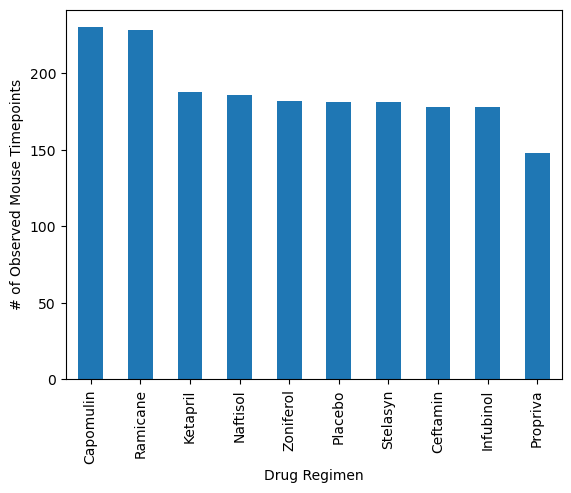

In [116]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df_mouse_ids = df_merge_drop.groupby("Drug Regimen")[["Mouse ID"]].count()
df_mouse_ids2 = df_mouse_ids.reset_index()
df_mouse_ids2.sort_values("Mouse ID",ascending=False, inplace=True)
df_mouse_ids2.plot.bar("Drug Regimen", "Mouse ID", ylabel="# of Observed Mouse Timepoints", legend=False);


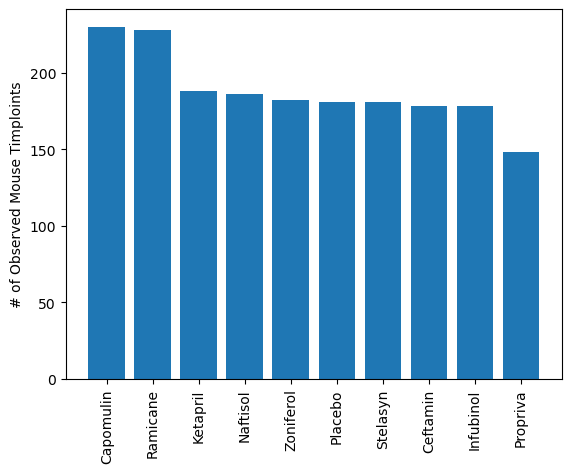

In [124]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(df_mouse_ids2["Drug Regimen"], df_mouse_ids2["Mouse ID"])
plt.ylabel ("# of Observed Mouse Timploints")
plt.xticks(rotation=90);

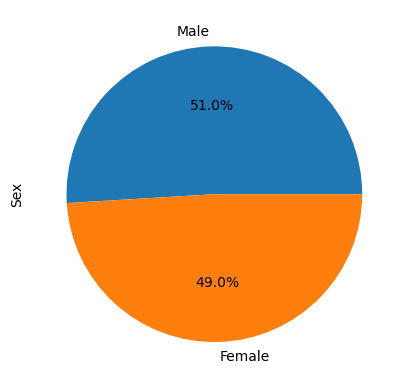

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_mf = df_merge_drop.groupby("Sex")[["Sex"]].count()
df_mf.rename(columns={"Sex": "Count"}, inplace=True)
df_mf.sort_values(by="Count", inplace=True, ascending=False)
df_mf.plot.pie (y="Count", legend=False, autopct='%1.1f%%')
plt.ylabel("Sex");

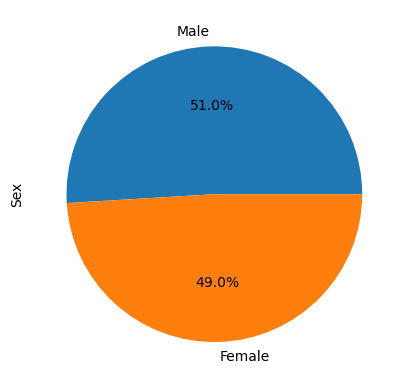

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df_mf["Count"],labels=df_mf.index,autopct='%1.1f%%')
plt.ylabel("Sex");

## Quartiles, Outliers and Boxplots

In [193]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_drugs = df_merge_drop[df_merge_drop["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
df_drugs_last = pd.DataFrame(df_drugs.groupby("Mouse ID")["Timepoint"].max())
df_drugs_last.reset_index(inplace=True)
df_drugs_last

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_max_timepoint = df_merge_drop.merge(df_drugs_last, left_on=["Mouse ID","Timepoint"], right_on=["Mouse ID","Timepoint"], how="inner")
df_tumor_vol = df_max_timepoint[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)"]]

In [222]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = df_tumor_vol["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = df_tumor_vol[df_tumor_vol['Drug Regimen']==drug]["Tumor Volume (mm3)"]
    
    # add subset 
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    
    # Determine outliers using upper and lower bounds
    outliers = tumor[ (tumor < lower_bound) | (tumor > upper_bound) ]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 1    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


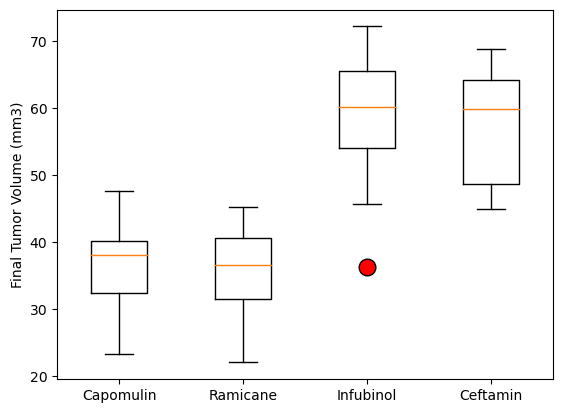

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drug_series = []
for drug in treatments:
    s = df_tumor_vol[df_tumor_vol["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    s.reset_index(drop=True, inplace=True)
    s.name = drug
    drug_series.append(s)
df_vol_by_drug = pd.concat(drug_series, axis=1, ignore_index=True )
df_vol_by_drug.rename(columns = {0:"Capomulin", 1:"Infubinol", 2 : "Ramicane", 3 : "Ceftamin"},inplace=True)
df_vol_by_drug.plot.box()
plt.ylabel("Final Tumor Volume (mm3)");

## Line and Scatter Plots

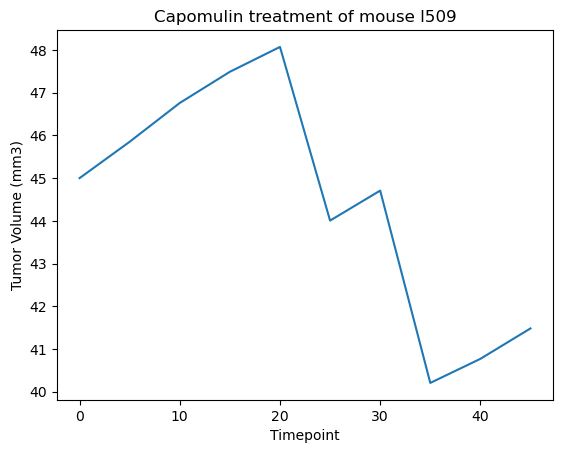

In [272]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_cap = df_merge_drop[df_merge_drop['Drug Regimen']=="Capomulin"]
df_mouse = df_cap[df_cap["Mouse ID"]=="l509"]
df_mouse.plot.line("Timepoint","Tumor Volume (mm3)",legend=False )
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)");

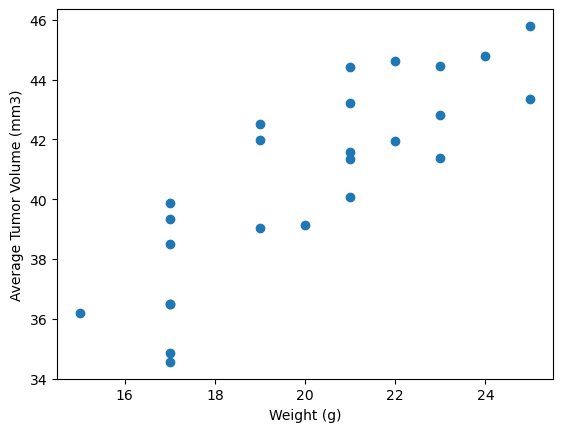

In [285]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_wt = df_cap.groupby("Mouse ID")["Weight (g)"].first()
mouse_wt

mouse_vol =df_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_vol

plt.scatter(mouse_wt,mouse_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)");

## Correlation and Regression

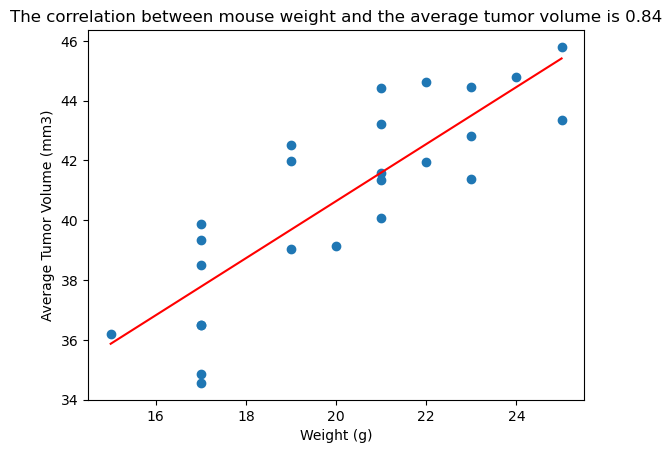

In [297]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy import stats
import numpy as np
corr = np.corrcoef(mouse_wt, mouse_vol)[1,0]
plt.scatter(mouse_wt,mouse_vol)
plt.title("The correlation between mouse weight and the average tumor volume is "  + str(round(corr,2)))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)");
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(mouse_wt, mouse_vol)
min_wt = mouse_wt.min()
max_wt = mouse_wt.max()
xs = [min_wt, max_wt]
ys = [d_slope*min_wt + d_int, d_slope*max_wt + d_int]
plt.plot(xs,ys, color="r");